### Illustrating efects of tails of distribution.
```
Suppose we have two normal distributions of same amplitude, but shifted by one sigma.
For simplicity, m1=4.5, m2=5.5, sigma1==sigma2==1
Now we choose N random samples from each distribution.
Question:
What is the probabiltiy that the maximum value will come from m2 
(as a function of N)?
```


In [1]:
import sys, os
from IPython.display import clear_output
import scipy.stats, numpy as np, pandas as pd, time, datetime
import matplotlib.pyplot as plt
# High-resolution plot outputs for Retina notebooks
%config InlineBackend.figure_format = 'retina'

In [2]:
gr_sizes = [1,2,3,4,5,6,7,8,9,10]
gr_sizes.extend([12,15,20,25,30,35,40,50,70,100,125,150,200])
gr_sizes.extend([250,300,350,400,450,500,700,1000])
gr_sizes.extend([2000,5000,10000])
# gr_sizes.extend([20000,50000])
# gr_sizes.extend([100000,200000,1000000])
print(gr_sizes)
print(datetime.datetime.now())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 35, 40, 50, 70, 100, 125, 150, 200, 250, 300, 350, 400, 450, 500, 700, 1000, 2000, 5000, 10000]
2022-07-09 17:56:26.844108


In [3]:
# range 0-10
mymean = 5
sigma = 1
myshift = 0.5*sigma
m1=mymean - myshift
m2=mymean + myshift
N_experiments_per_red_spot = 2048
N_red_dots_per_gr_size = 40
# -------------------------------------------------------
def sample_value(center=5,sigma=1,r1=0.001,r2=9.999):
    vv = scipy.stats.norm.rvs(loc=center, scale=sigma)
    while (vv < r1) or (vv > r2):
        vv = scipy.stats.norm.rvs(loc=center, scale=sigma)
    return vv

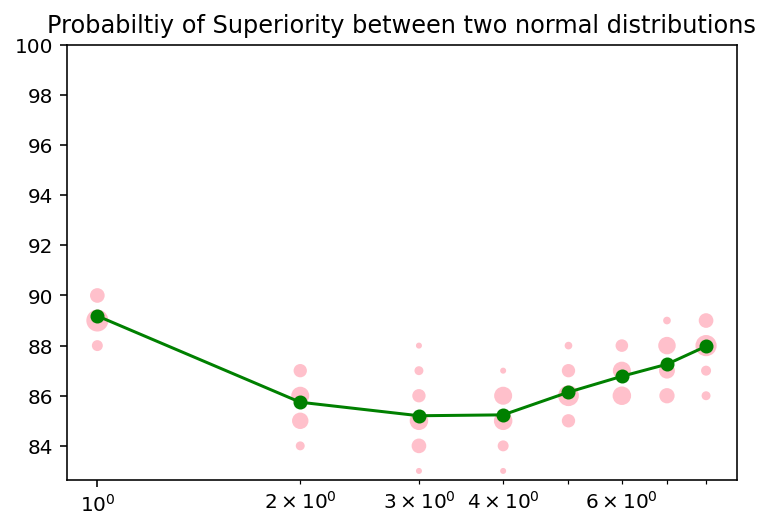

ALL DONE, elapsed seconds = 148


In [4]:
t1=time.time()
result_all = []
result_ave = []

print(datetime.datetime.now())
try:

    for gr_size in gr_sizes:  # size of group

        # print("\n\n" + "-"*60)
        # print("Calculating group size ", gr_size)
        t1_gr = time.time()
        # ----------------------
        for n_red_dots in range(N_red_dots_per_gr_size):
            # ----------------------
            result_groups = []
            for n_exp in range(N_experiments_per_red_spot):
                max1 = m1
                max2 = m2
                for n_sample in range(0,gr_size):
                    v1 = sample_value(center=m1)
                    v2 = sample_value(center=m2)
                    if v1 > max1:
                        max1 = v1 
                    if v2 > max2:
                        max2 = v2 
                is_it_2 = 0
                if max2 > max1:
                    is_it_2 = 1
                result_groups.append(is_it_2)
            # ----------------------
            myprob_from_groups = 1.0 * sum(result_groups) / len(result_groups)
            result_all.append((gr_size, myprob_from_groups))
            # ----------------------

        # ----------------------
        df = pd.DataFrame(result_all, columns=["gr_size","proba"])
        mask = df.gr_size == gr_size
        aver_val = df[mask]["proba"].mean()
        result_ave.append((gr_size, aver_val*100))
        df_ave =  pd.DataFrame(result_ave, columns=["gr_size","proba_pct"])

        # ----------------------
        t2_gr = time.time()
        # print("gr_size = %d, seconds = %d, last_val = %.4f" % ( gr_size , int(t2_gr-t1_gr), aver_val ))
        # print("N experiments per red spot = %d" % N_experiments_per_red_spot)
        # print("N red spots per group size = %d" % N_red_dots_per_gr_size)
        # print("Y-axes: probability (pct) that max comes from v2")
        # print("X-axes: group size N = N1 = N2")
        df['one'] = 1
        df['proba_pct'] = df['proba'].map(lambda x: int(round(100*x)))
        df_all = df[["gr_size","proba_pct","one"]].groupby(["gr_size","proba_pct"],as_index=False).sum()

        # ----------------------
        # print(" ")
        clear_output(wait=True)
        _ = plt.scatter(df_all["gr_size"],df_all["proba_pct"], s=4*df_all["one"],color="pink")
        _ = plt.plot(df_ave["gr_size"],df_ave["proba_pct"],color="green",marker='o')
        _ = plt.xscale("log")
        _ = plt.ylim(top=100)
        _ = plt.title("Probabiltiy of Superiority between two normal distributions")
        _ = plt.show()
        # print(datetime.datetime.now())
        # ----------------------
except KeyboardInterrupt:
    pass

# print(result_all)
t2 = time.time()
print("ALL DONE, elapsed seconds = %d"%(int(t2-t1)))